In [111]:
## import the libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import nltk
import string 
import seaborn as sns 



from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from collections import Counter 

from wordcloud import WordCloud

In [13]:
df = pd.read_csv(r"datasets/sms_spam_data/spam.csv", encoding = 'latin-1')

In [15]:
df.shape

(5572, 5)

In [16]:
 df.info() # we can see that last 3 columns have only some values so we will drop these 
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
# drop last 3 cols 

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace =True)

In [20]:
# rename the v1 and v2 columns 

df.rename(columns = {'v1':'target', 'v2': 'text'}, inplace = True)

In [25]:
# encoding the target values to 0 and 1 

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [27]:
# check for missing values 

df.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
# check for duplicate values 

df.duplicated().sum()

403

In [29]:
# removing duplicates while keeping the first one

df = df.drop_duplicates(keep ='first')

In [30]:
# EDA : Exploratary data analysis, understanding the data 


# check what percentage is spam vs ham 


df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

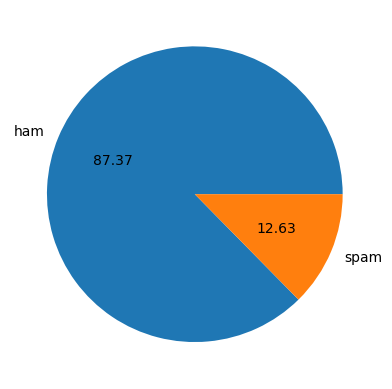

In [33]:
# show using a pie chart 

plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')

plt.show()

# Clearly the data is highly imbalanced !!!!!! 

In [77]:
# using natural language toolkit library to get to know about the components of the messages 

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\HP-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\HP-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [36]:
# counting the number of characters 

df['num_characters']   = df['text'].apply(len)

In [38]:
# count number of words in a text 

df['num_words']  = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [39]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [41]:
# count number of sentences in a text message 

df['num_sentences']  = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [43]:
# getting the stastical data of some of the columns 

df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()



,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

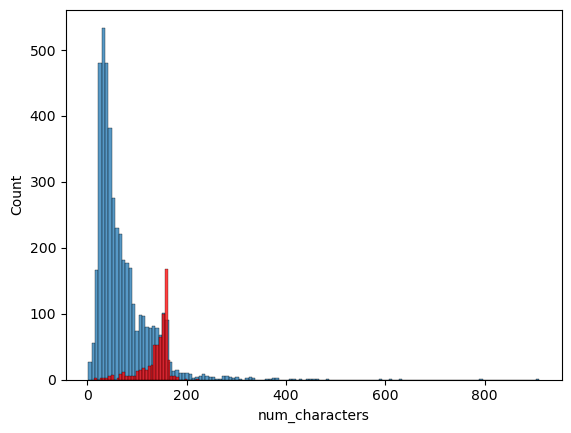

In [62]:
sns.histplot(df[df['target'] == 0]['num_characters'])

sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')



# we can observe that most of the legit messages have lesser number of characters whereas spams have more 

<Axes: xlabel='num_words', ylabel='Count'>

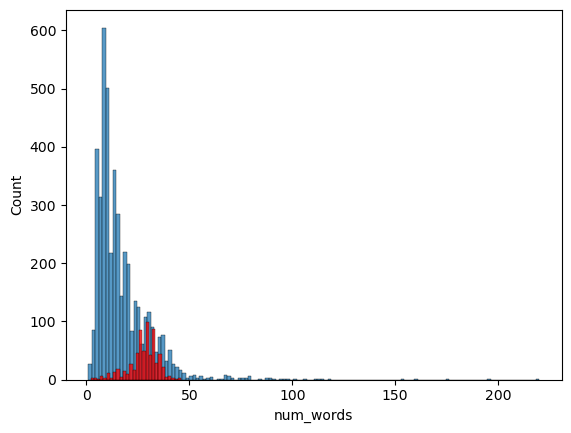

In [63]:
sns.histplot(df[df['target'] == 0]['num_words'])

sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

C:\Users\HP-PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


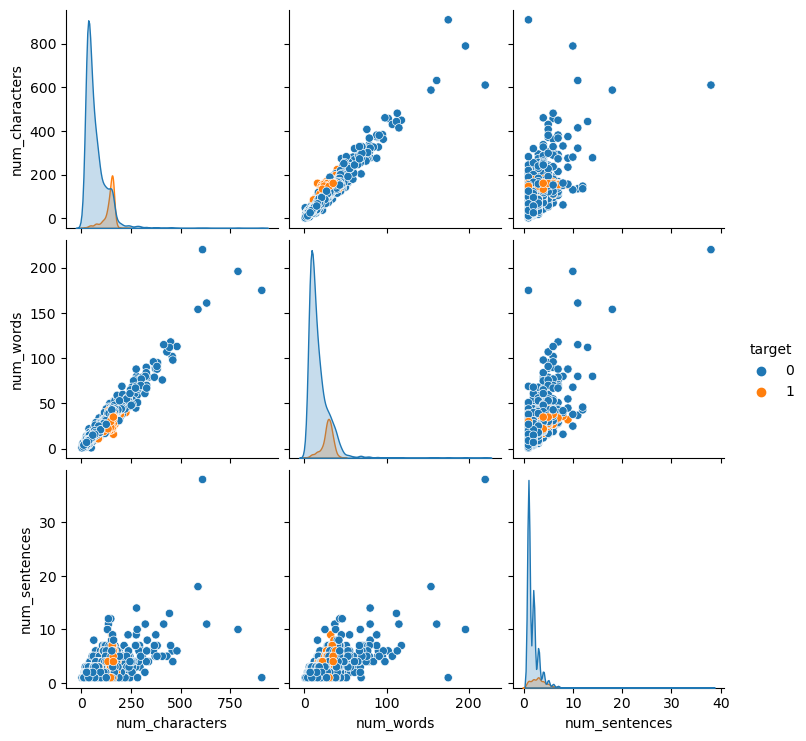

In [64]:
sns.pairplot(df, hue = 'target')

In [66]:
# finding co-relation 

df.corr(numeric_only =True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

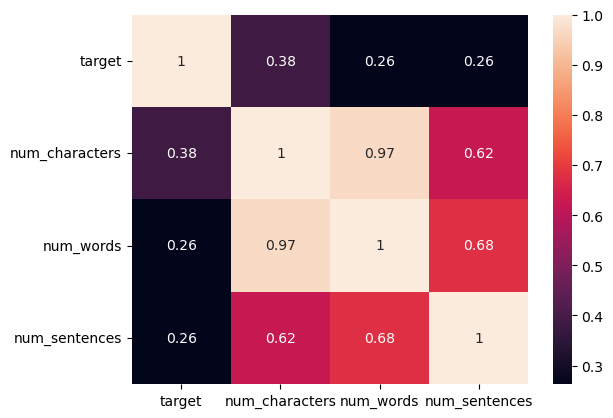

In [67]:
sns.heatmap(df.corr(numeric_only = True), annot = True )

In [88]:
## Data Preprocessing : Lowercase, Tokenization, Removing Speical Characters, Removing stop words and puntuation, stemming 

ps = PorterStemmer()

def transform_text(text):
    text = text.lower() # converting to lowercase
    text = nltk.word_tokenize(text) # tokenize each word in text
    y = []
    
    # remove special characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y 
    y = []
    
    # removing stop words & also punctuation marks 
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y 
    y = []
    
    # stemming the words 
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y) # return the cleaned string back 

In [89]:
transform_text("I loved, the youtube lectures on machine learning. How about you ??")

'love youtub lectur machin learn'

In [90]:
transform_text(df['text'][2000])

'b go 2 sch mon si need 2 take smth'

In [91]:
df['transformed_text'] = df['text'].apply(transform_text)

In [94]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [97]:

wc  = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [101]:
# Generate the word cloud of spam words 

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep= " "))

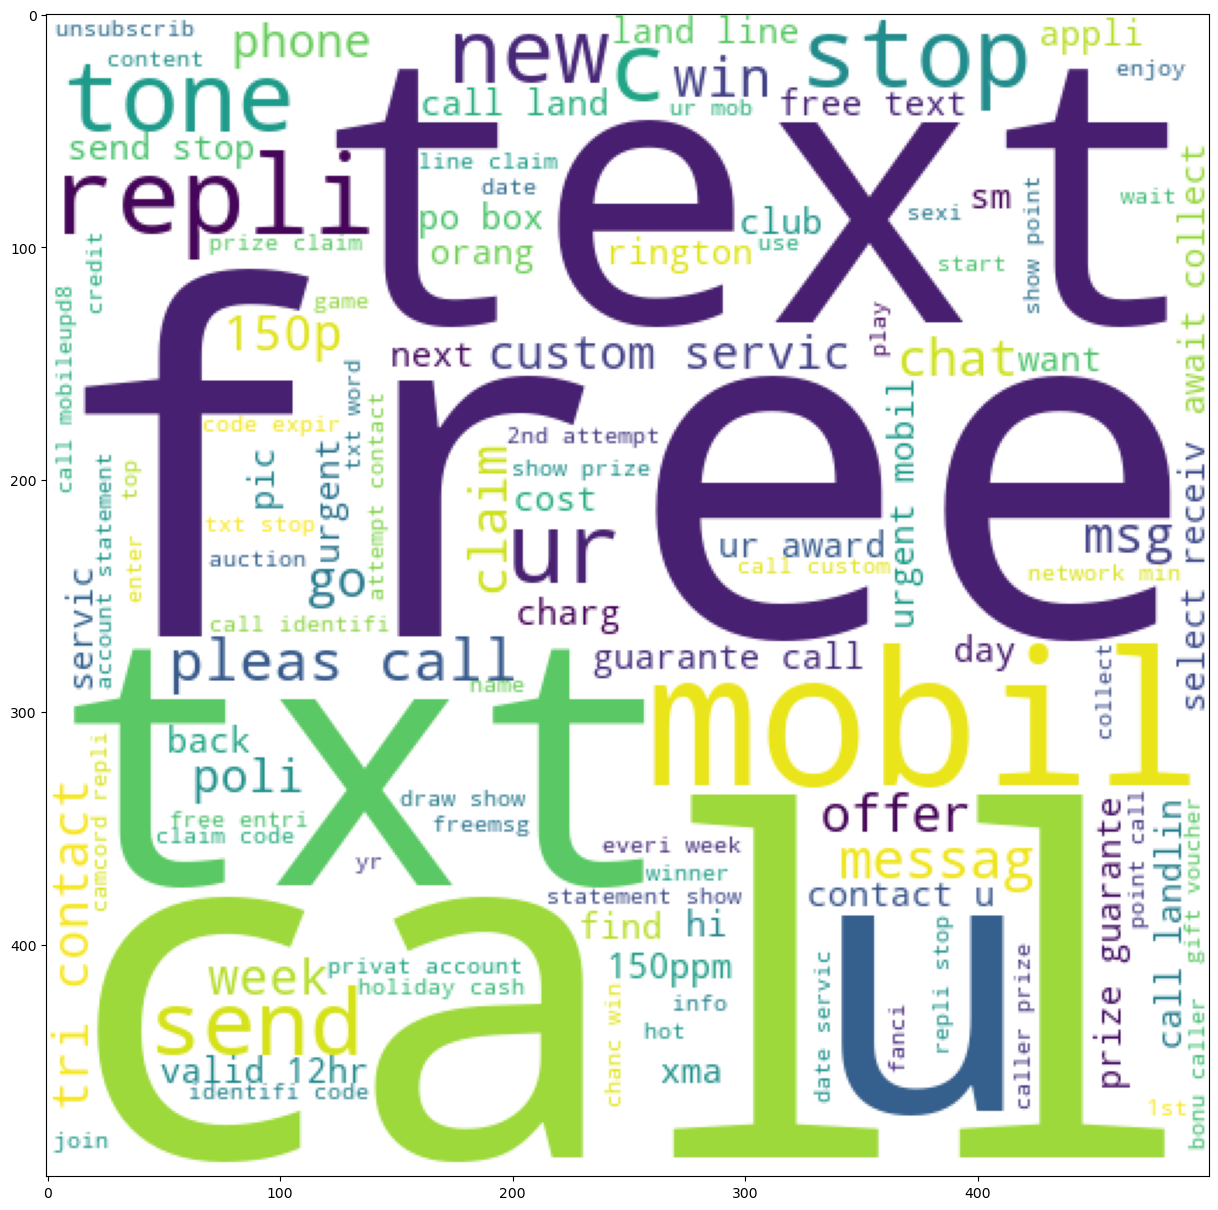

In [104]:
plt.figure(figsize = (15, 16))
plt.imshow(spam_wc)

In [108]:
not_spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep= " "))

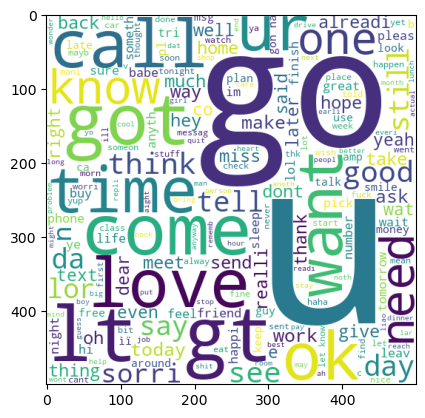

In [109]:
plt.imshow(not_spam_wc)

In [112]:
# exact top words used in spam messages 

spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

len(spam_corpus)

9939

In [125]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [133]:
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30))


In [153]:
## Text Vectorization : using bag of words 

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score



tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [155]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [156]:
X.shape

(5169, 6708)

In [157]:
y = df['target'].values

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)

In [159]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [160]:
# Trying Gaussian Naive Bayes Algorithm 

gnb.fit(X_train , Y_train)
Y_pred = gnb.predict(X_test)

print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(precision_score(Y_test, Y_pred))

0.8677494199535963
[[981 146]
 [ 25 141]]
0.4912891986062718


In [161]:
# Trying Multinomial Naive Bayes 

mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)

print(accuracy_score(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))
print(precision_score(Y_test, Y_pred2))

0.9574632637277649
[[1127    0]
 [  55  111]]
1.0


In [162]:
# Trying Bernoulii Naive Bayes 

bnb.fit(X_train, Y_train)
Y_pred3 = mnb.predict(X_test)

print(accuracy_score(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))
print(precision_score(Y_test, Y_pred3))

0.9574632637277649
[[1127    0]
 [  55  111]]
1.0


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [164]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [165]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [166]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [168]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9706109822119103, 0.9776119402985075)

In [170]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9706109822119103
Precision -  0.9776119402985075
For  KN
Accuracy -  0.8955916473317865
Precision -  1.0
For  NB
Accuracy -  0.9574632637277649
Precision -  1.0
For  DT
Accuracy -  0.9358081979891725
Precision -  0.8952380952380953
For  LR
Accuracy -  0.951276102088167
Precision -  0.9401709401709402
For  RF
Accuracy -  0.9644238205723125
Precision -  0.9918032786885246
For  AdaBoost
Accuracy -  0.9721577726218097
Precision -  0.9577464788732394
For  BgC
Accuracy -  0.951276102088167
Precision -  0.8705035971223022
For  ETC
Accuracy -  0.9644238205723125
Precision -  0.9918032786885246
For  GBDT
Accuracy -  0.9450889404485692
Precision -  0.9702970297029703
For  xgb
Accuracy -  0.9690641918020109
Precision -  0.9565217391304348


In [171]:
## We can further improve the performance by scaling the data 